In [1]:
#CT 1
#Question 1
import numpy as np
import math

def newtonRaphson(f, df, x0, tol=1.0e-9, max_iter=100):
    for i in range(max_iter):
        fx = f(x0)
        dfx = df(x0)
        if abs(dfx) < 1e-12:  # Avoid division by zero
            raise ZeroDivisionError("Derivative too small.")
        x1 = x0 - fx / dfx
        if abs(x1 - x0) < tol:
            return x1, i + 1
        x0 = x1
    raise RuntimeError("Too many iterations")

# Define the function and its derivative
def f(x):
    return math.sin(x) + 3 * math.cos(x) - 2

def df(x):
    return math.cos(x) - 3 * math.sin(x)

# Initial guesses (chosen to find two roots in (-2, 2))
x0_list = [-1.0, 1.0]
roots = []

for x0 in x0_list:
    root, iterations = newtonRaphson(f, df, x0)
    roots.append(root)
    print(f"Initial guess: {x0}")
    print(f"Root found: {root:.6f}")
    print(f"Iterations: {iterations}\n")

Initial guess: -1.0
Root found: -0.564327
Iterations: 5

Initial guess: 1.0
Root found: 1.207828
Iterations: 5



In [2]:
#question 2
# Newton-Gregory Forward Interpolation Formula
import math

# Given data
years = [1891, 1901, 1911, 1921, 1931]
populations = [46, 66, 81, 93, 101]

# Step size (h)
h = years[1] - years[0]

# Function to build forward difference table
def forward_diff_table(y_values):
    n = len(y_values)
    diff_table = [y_values[:]]
    for i in range(1, n):
        column = []
        for j in range(n - i):
            delta = diff_table[i - 1][j + 1] - diff_table[i - 1][j]
            column.append(delta)
        diff_table.append(column)
    return diff_table

# Newton’s Forward Interpolation Function
def newtons_forward(x, x0, h, diff_table):
    t = (x - x0) / h
    result = diff_table[0][0]
    u_term = 1
    for i in range(1, len(diff_table)):
        u_term *= (t - i + 1)
        term = (u_term * diff_table[i][0]) / math.factorial(i)
        result += term
    return result

# Build difference table
diff_table = forward_diff_table(populations)

# Estimate population for 1895 and 1925
x1 = 1895
x2 = 1925
pop_1895 = newtons_forward(x1, years[0], h, diff_table)
pop_1925 = newtons_forward(x2, years[0], h, diff_table)

# Population increase
increase = pop_1925 - pop_1895

# Results
print(f"Estimated population in {x1} = {pop_1895:.2f} thousand")
print(f"Estimated population in {x2} = {pop_1925:.2f} thousand")
print(f"Estimated increase in population (1895–1925) = {increase:.2f} thousand")

Estimated population in 1895 = 54.85 thousand
Estimated population in 1925 = 96.84 thousand
Estimated increase in population (1895–1925) = 41.98 thousand


In [4]:
#Question 3
# Lagrange’s Inverse Interpolation Formula
x = [94.8, 87.9, 81.3, 68.7]  # A values
y = [2, 5, 8, 4]              # Corresponding t values
xv = 85                       # Given A = 85, find t

def lagrange_interpolation(x, y, xv):
    n = len(x)
    result = 0.0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (xv - x[j]) / (x[i] - x[j])
        result += term
    return result

estimated_t = lagrange_interpolation(x, y, xv)
print(f"Estimated value of t when A = {xv} is approximately {estimated_t:.4f}")

Estimated value of t when A = 85 is approximately 6.4704


In [5]:
#CT 2
#Question 1
import numpy as np
import math
x_values = [1.70, 1.74, 1.78, 1.82, 1.86]
y_values = [0.9916, 0.9857, 0.9781, 0.9691, 0.9584]
h = x_values[1] - x_values[0]  

diff = [
    [y_values[0], 
     y_values[1] - y_values[0], 
     y_values[2] - 2 * y_values[1] + y_values[0],
     y_values[3] - 3 * y_values[2] + 3 * y_values[1] - y_values[0],
     y_values[4] - 4 * y_values[3] + 6 * y_values[2] - 4 * y_values[1] + y_values[0]]
]
t = (1.72 - 1.70) / h
def derivative_newton_forward(t, h, diff):
    result = diff[0][1]

    if len(diff[0]) >= 3:
        result += ((2 * t - 1) / 2) * diff[0][2]
    if len(diff[0]) >= 4:
        result += ((3 * t**2 - 6 * t + 2) / 6) * diff[0][3]
    if len(diff[0]) >= 5:
        result += ((4 * t**3 - 18 * t**2 + 22 * t - 6) / 24) * diff[0][4]

    return result / h
approx_cos_1_72 = derivative_newton_forward(t, h, diff)
print(f"Approximate cos(1.72): {approx_cos_1_72}")

import numpy as np

x_values = [1.70, 1.74, 1.78, 1.82, 1.86]
y_values = [0.9916, 0.9857, 0.9781, 0.9691, 0.9584]

h = x_values[1] - x_values[0]  
diff = [[
    y_values[-1],
    y_values[-1] - y_values[-2],
    y_values[-1] - 2*y_values[-2] + y_values[-3],
    y_values[-1] - 3*y_values[-2] + 3*y_values[-3] - y_values[-4],
    y_values[-1] - 4*y_values[-2] + 6*y_values[-3] - 4*y_values[-4] + y_values[-5]
]]

t = (1.84 - x_values[-1]) / h

def derivative_newton_backward(t, h, diff):
    result = diff[0][1]  

    if len(diff[0]) >= 3:
        result += ((2 * t + 1) / 2) * diff[0][2]
    if len(diff[0]) >= 4:
        result += ((3 * t**2 + 6 * t + 2) / 6) * diff[0][3]
    if len(diff[0]) >= 5:
        result += ((4 * t**3 + 18 * t**2 + 22 * t + 6) / 24) * diff[0][4]

    return result / h

approx_cos_1_84 = derivative_newton_backward(t, h, diff)
print(f"Approximate cos(1.84): {approx_cos_1_84:.6f}")


Approximate cos(1.72): -0.14843750000000042
Approximate cos(1.84): -0.266562


length: 1001
x values: [0.    0.001 0.002 ... 0.998 0.999 1.   ]
f(x) values: [1.         0.999999   0.999996   ... 0.501001   0.50050025 0.5       ]
Trapezoidal value: 0.785398121730781
Simpson's one-third value: 0.785398163397449
Simpson's three-eighth value: 0.7852731009078647


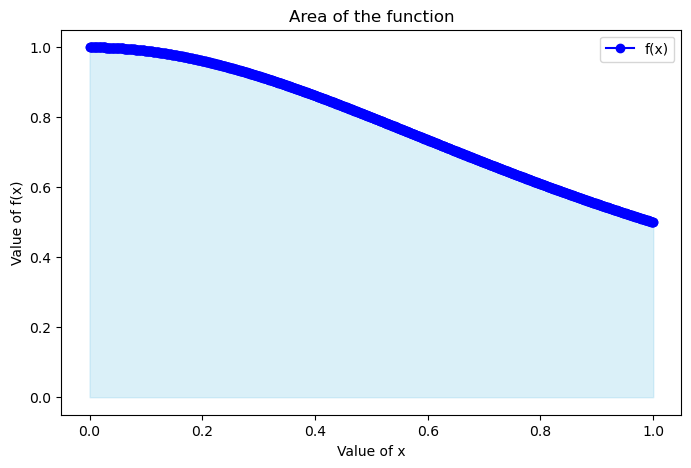

In [6]:
#Question 2
import numpy as np
def f(x):
    return 1/(1+(x**2))
a = 0
b = 1
h = 0.001
x = np.arange(a, b + h, h)
y = f(x)
n=len(x)
print("length:", n)
print("x values:", x)
print("f(x) values:", y)
t1=0
for i in range (1,n-1, 1):
    t1 += y[i]
trap=(h/2)*(y[0]+2*t1+y[n-1])
print("Trapezoidal value:", trap)

s1=0
s2=0
for i in range (1,n-1, 2):
    s1 += y[i]
for i in range (2,n-2, 2):
    s2 += y[i]
sim1=(h/3)*(y[0]+4*s1+2*s2+y[n-1])
print("Simpson's one-third value:", sim1)

s3 = 0
s4 = 0
for i in range(1, n - 1):
    if i % 3 == 0:
        s4 += y[i]
    else:
        s3 += y[i]
sim3 = (3 * h / 8) * (y[0] + 3 * s3 + 2 * s4 + y[n - 1])
print("Simpson's three-eighth value:", sim3)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'bo-', label='f(x)')
plt.fill_between(x, y, alpha=0.3, color='skyblue')
plt.title('Area of the function')
plt.xlabel('Value of x')
plt.ylabel('Value of f(x)')
plt.legend()
plt.show()


In [7]:
#Question 3
import math as m

# Define the differential equation dy/dx = x^2 + y^2
def f(x, y):
    return x**2 + y**2

# Initial conditions
x0 = 0
y0 = 0
h = 0.1

# RK4 method
def rk4_step(x, y, h):
    k1 = h * f(x, y)
    k2 = h * f(x + h/2, y + k1/2)
    k3 = h * f(x + h/2, y + k2/2)
    k4 = h * f(x + h, y + k3)
    y_next = y + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    return y_next

# Solve over [0, 0.4]
print("x\t\ty")
print(f"{x0:.1f}\t{y0:.6f}")

for i in range(4):  # 4 steps from 0 to 0.4
    y0 = rk4_step(x0, y0, h)
    x0 += h
    print(f"{x0:.1f}\t{y0:.6f}")

x		y
0.0	0.000000
0.1	0.000333
0.2	0.002667
0.3	0.009003
0.4	0.021359
